<a href="https://colab.research.google.com/github/nalymugwe/The-MLC-Projects/blob/main/Seoul_Bike_Trip_Duration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import log_loss

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics



# Import data and preprocessing

In [3]:
#check working directory
!pwd


/content


In [4]:
# Mount colab onto Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
# Import OS and see list of files
import os
os.chdir('/content/gdrive/MyDrive/Data Science/MLC 30Day ML Aug Challenge/Seoul Bike Trip Duration')
!ls

 For_modeling.csv   gtfh9z865f-1.zip   logs.log  'Seoul Bike Trip Duration.pdf'


In [6]:
# Load data
Data = pd.read_csv('/content/gdrive/MyDrive/Data Science/MLC 30Day ML Aug Challenge/Seoul Bike Trip Duration/For_modeling.csv')
Data.head()

Unnamed: 0  Duration  Distance      PLong  ...  Solar  Snow  GroundTemp  Dust
0           0         3        50  37.544666  ...    0.0   0.0        -2.2  25.0
1           1        24      7670  37.506199  ...    0.0   0.0        -2.2  25.0
2           2         8      1390  37.544590  ...    0.0   0.0        -2.2  25.0
3           3         8      1820  37.571102  ...    0.0   0.0        -2.2  25.0
4           4         4       850  37.573242  ...    0.0   0.0        -2.2  25.0

[5 rows x 26 columns]

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      int64  
 9   Pday        int64  
 10  Phour       int64  
 11  Pmin        int64  
 12  PDweek      int64  
 13  Dmonth      int64  
 14  Dday        int64  
 15  Dhour       int64  
 16  Dmin        int64  
 17  DDweek      int64  
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(13), int64(13)
memory usage: 1.9 GB


## Description of the features

pickup date and time:	  PD time

dropoff date and time:	DDtime

pickup longitude:     	PLong	

pickup latitude:      	PLatd	

dropoff longitude:    	DLong	

dropoff latitude:       DLatd	

haversine distance:   	Haversine	

pickup month:           Pmonnth	

pickup day	            Pday	

pickup hour	            Phour	

pickup minute	          Pmin	

pickup day of the week:	PDweek

dropoff month:          Dmonth	

dropoff day	            Dday	

dropoff hour	          Dhour	

dropoff minute	        Dmin

dropoff day of the week:DDweek

temperature:	          Temp	

precipitation:        	Precip	

windspeed:	            Wind

humidity:             	Humd	

solar radiation:      	Solar	

snow fall: 	            Snow	

ground temperature:   	GroundTemp

1hour avg fine dust concentration:	Dust	

In [8]:
# Check for any Nan values
Data.isnull().sum().sum()

0

In [9]:
# Remove the first column

Data2 = Data.iloc[: , 1:]
Data2.head()

Duration  Distance      PLong       PLatd  ...  Solar  Snow  GroundTemp  Dust
0         3        50  37.544666  126.888359  ...    0.0   0.0        -2.2  25.0
1        24      7670  37.506199  127.003944  ...    0.0   0.0        -2.2  25.0
2         8      1390  37.544590  127.057083  ...    0.0   0.0        -2.2  25.0
3         8      1820  37.571102  127.023560  ...    0.0   0.0        -2.2  25.0
4         4       850  37.573242  127.015907  ...    0.0   0.0        -2.2  25.0

[5 rows x 25 columns]

In [10]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


In [11]:
# Check the summary statistics of data
Data2.describe()


Duration      Distance  ...    GroundTemp          Dust
count  9.601139e+06  9.601139e+06  ...  9.601139e+06  9.601139e+06
mean   2.580294e+01  3.713519e+03  ...  2.072376e+01  3.245798e+01
std    2.504333e+01  3.956611e+03  ...  1.265221e+01  2.407264e+01
min    1.000000e+00  1.000000e+00  ... -1.360000e+01  0.000000e+00
25%    8.000000e+00  1.230000e+03  ...  1.160000e+01  1.600000e+01
50%    1.600000e+01  2.280000e+03  ...  2.110000e+01  2.700000e+01
75%    3.600000e+01  4.620000e+03  ...  2.850000e+01  4.200000e+01
max    1.190000e+02  3.329000e+04  ...  6.220000e+01  3.040000e+02

[8 rows x 25 columns]

# Exploratory Data Analysis

In [12]:
# Scale the data for the values to be between 0 and 1

scaler = MinMaxScaler()
Scaled_Data = pd.DataFrame(scaler.fit_transform(Data2.values), columns=Data2.columns, index=Data2.index)
Scaled_Data.head()



Duration  Distance     PLong     PLatd  ...  Solar  Snow  GroundTemp      Dust
0  0.016949  0.001472  0.425413  0.235178  ...    0.0   0.0    0.150396  0.082237
1  0.194915  0.230376  0.273037  0.538020  ...    0.0   0.0    0.150396  0.082237
2  0.059322  0.041725  0.425112  0.677248  ...    0.0   0.0    0.150396  0.082237
3  0.059322  0.054643  0.530131  0.589415  ...    0.0   0.0    0.150396  0.082237
4  0.025424  0.025504  0.538608  0.569364  ...    0.0   0.0    0.150396  0.082237

[5 rows x 25 columns]

In [13]:
# Check the correlation of the features

Corr_Data = Scaled_Data.corr()
Corr_Data

Duration  Distance     PLong  ...      Snow  GroundTemp      Dust
Duration    1.000000  0.739233 -0.049251  ... -0.016298    0.120210 -0.021431
Distance    0.739233  1.000000 -0.050252  ... -0.015968    0.067324 -0.035999
PLong      -0.049251 -0.050252  1.000000  ... -0.003165    0.000430  0.004963
PLatd      -0.003411 -0.013090  0.127341  ... -0.004389    0.000043 -0.002627
DLong      -0.043889 -0.042184  0.929560  ... -0.003395    0.000671  0.004001
DLatd      -0.003776 -0.012521  0.128974  ... -0.004436    0.000933 -0.002122
Haversine   0.352915  0.579833 -0.036078  ... -0.010264    0.001582 -0.017494
Pmonth     -0.045792 -0.039448 -0.006123  ... -0.005401   -0.138882 -0.078880
Pday       -0.009698 -0.008762  0.000319  ...  0.052220   -0.019690  0.081507
Phour       0.133392  0.098925 -0.014657  ... -0.018915    0.090802 -0.029922
Pmin       -0.003832 -0.010254  0.002791  ...  0.002984    0.013429  0.005487
PDweek      0.080753  0.051775  0.002027  ...  0.036894    0.062015 -0.053923
Dmonth     -0.045624 -0.039293 -0.006125  ... -0.005395   -0.138867 -0.078963
Dday       -0.009754 -0.008766  0.000306  ...  0.052137   -0.019646  0.081351
Dhour       0.140381  0.095262 -0.017352  ... -0.017585    0.112484 -0.008838
Dmin       -0.012516 -0.006631  0.000647  ...  0.000178   -0.005511  0.001416
DDweek      0.081320  0.052295  0.001923  ...  0.036908    0.061616 -0.053423
Temp        0.128204  0.097193 -0.004360  ... -0.116919    0.902920 -0.227242
Precip     -0.009453 -0.008845 -0.001140  ...  0.011267    0.002981 -0.028341
Wind        0.072325  0.031359 -0.003288  ... -0.010702    0.194507  0.115833
Humid      -0.096916 -0.034934  0.003820  ...  0.060919   -0.106779 -0.194931
Solar       0.072224 -0.003397  0.007705  ... -0.025255    0.614643  0.202873
Snow       -0.016298 -0.015968 -0.003165  ...  1.000000   -0.098555  0.007930
GroundTemp  0.120210  0.067324  0.000430  ... -0.098555    1.000000 -0.116394
Dust       -0.021431 -0.035999  0.004963  ...  0.007930   -0.116394  1.000000

[25 rows x 25 columns]

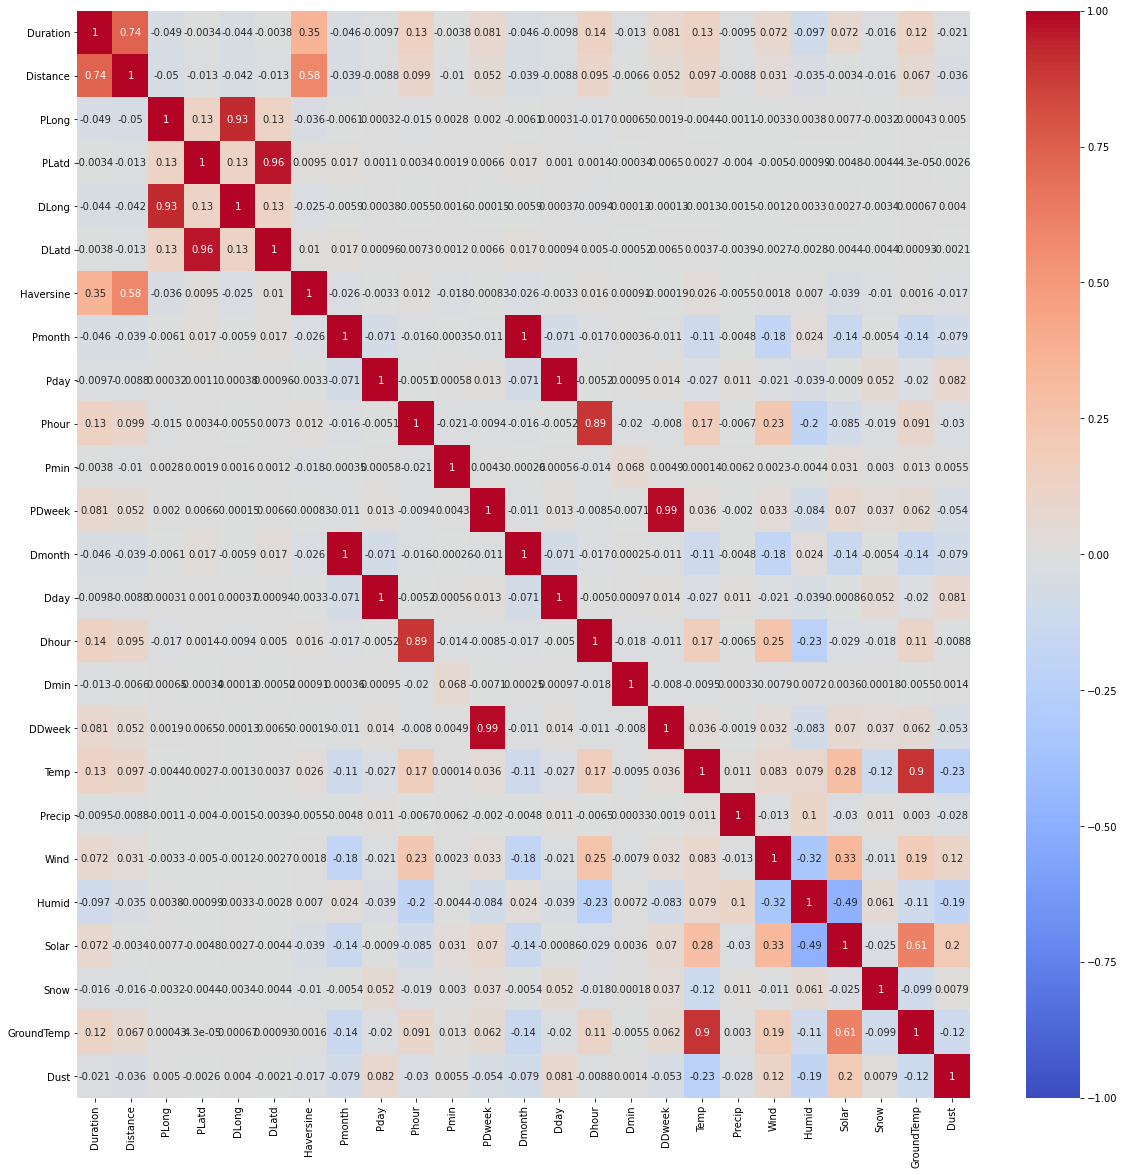

In [14]:
# Plot the correlation of the features

fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(Corr_Data, annot=True, vmin=-1, vmax=1, cmap='coolwarm',  ax=ax)


In [15]:
Scaled_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    float64
 1   Distance    float64
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      float64
 8   Pday        float64
 9   Phour       float64
 10  Pmin        float64
 11  PDweek      float64
 12  Dmonth      float64
 13  Dday        float64
 14  Dhour       float64
 15  Dmin        float64
 16  DDweek      float64
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(25)
memory usage: 1.8 GB


In [16]:
! pip install autoviz

     |████████████████████████████████| 44 kB 1.1 MB/s 


Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 25)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  24
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete

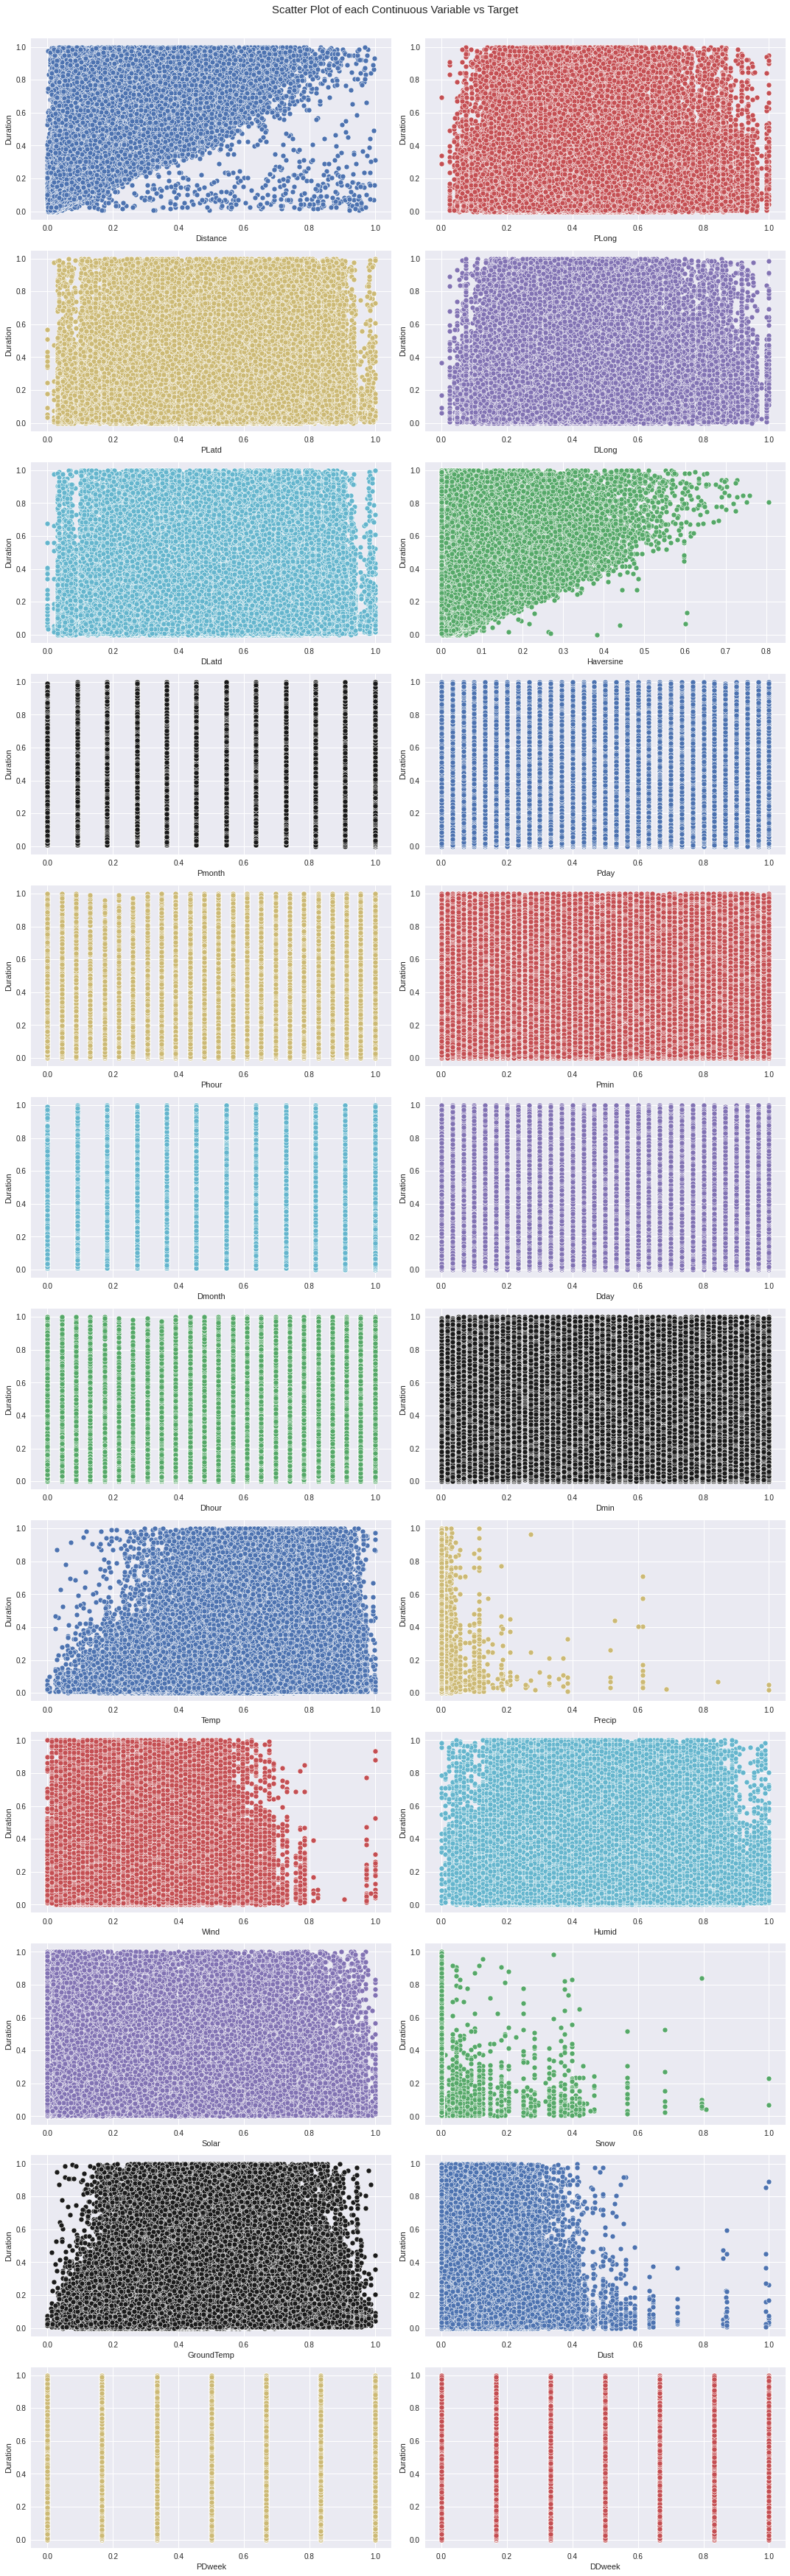

Number of All Scatter Plots = 300


In [ ]:
# Input the autoviz class and instantiate against the dependent variable

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
AutoViz_Data = AV.AutoViz(filename='', depVar="Duration", dfte=Scaled_Data)


# Observation from the vizualization

### Scatterplot analysis between the features against the target feature: Duration

The target feature is strongly correlated to distance and Haversine.

The target feature is weakly correlated to PHour, DHour, Temperature and Ground Tempature.

The target feature has no very little correlation with the rest of the features: PLong, PLatd, DLong, DLatd, Pmonth, PDay, Pmin, Dmonth, Dday, Dmin, wind, humid, solar, PDweek, DDweek, Precipitation, snow and dust.

From the above, the features that are moost applicable for modeling are distance, Haversine, PHour, DHour, Temperature and Ground Temparature.

## Modeling

We are dealing with a regression problem thus we'll use algorithms based on regression problems.

In [ ]:
features = Scaled_Data[['Distance', 'Haversine', 'Phour', 'Dhour', 'Temp', 'GroundTemp']]
features

In [ ]:
# Create a dataframe for the selected features and target feature

Model_Data = Scaled_Data[['Duration', 'Distance', 'Haversine', 'Phour', 'Dhour', 'Temp', 'GroundTemp']]
Model_Data.head()

In [ ]:
# Define X and y
X = Model_Data.drop('Duration',axis=1)
y = Model_Data['Duration']

print(X.shape)
print(y.shape)


In [21]:
# Split the data into training set and testset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25)

# Compare the models: Linear Regression
Linear_RegressionModel = LinearRegression().fit(X_train, y_train)
# Predict using test set 
y_prediction = Linear_RegressionModel.predict(X_test)
# Perform metrics on Linear Regression
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
# Print the metrics
print('Linear Regression R2 squared:', metrics.r2_score(y_test, y_prediction))
print('Linear Regression MAE: ', mae)
print('Linear RegressionMSE: ', mse)

# Compare the models: Ridge Regression
RidgeModel = Ridge(alpha=1.0)
RidgeModel.fit(X_train, y_train)
# Predict using test set 
y_prediction = RidgeModel.predict(X_test)
# Perform metrics on Ridge Regression
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
# Print the metrics
print('Ridge Regression R2 squared:', metrics.r2_score(y_test, y_prediction))
print('Ridge Regression MAE: ', mae)
print('Ridge RegressionMSE: ', mse)

# Compare the models: Decision Tree
Decision_TreeModel = DecisionTreeRegressor(random_state = 42) 
Decision_TreeModel.fit(X_train,y_train)
# Predict using test set 
y_prediction = Decision_TreeModel.predict(X_test)
# Perform metrics on the Decision Tree
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
# Print the metrics
print('Decision Tree R2 squared:',metrics.r2_score(y_test, y_prediction))
print('Decision Tree MAE: ', mae)
print('Decision Tree MSE: ', mse)

# Compare the models: XGBoost
XGBoostModel = XGBRegressor(random_state = 42) 
XGBoostModel.fit(X_train,y_train)
# Predict using test set 
y_prediction = XGBoostModel.predict(X_test)
# Perform metrics on the XGBoost
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
# Print the metrics
print('XGBoost R2 squared:',metrics.r2_score(y_test, y_prediction))
print('XGBoost Forest MAE: ', mae)
print('XGBoost Forest MSE: ', mse)

# Compare the models: LightGBM
LightGBMModel = LGBMRegressor(random_state = 42) 
LightGBMModel.fit(X_train,y_train)
# Predict using test set 
y_prediction = LightGBMModel.predict(X_test)
# Perform metrics on the LightGBM
mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
# Print the metrics
print('LightGBM R2 squared:',metrics.r2_score(y_test, y_prediction))
print('LightGBM Forest MAE: ', mae)
print('LightGBM Forest MSE: ', mse)



Linear Regression R2 squared: 0.5640183850876597
Linear Regression MAE:  0.08644994793295172
Linear RegressionMSE:  0.019628923711018813
Ridge Regression R2 squared: 0.5640183856565859
Ridge Regression MAE:  0.08645032368139496
Ridge RegressionMSE:  0.019628923685404406
Decision Tree R2 squared: 0.6886523788404437
Decision Tree MAE:  0.06917612449402738
Decision Tree MSE:  0.014017606463925998
[14:13:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:21] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBoost R2 squared: 0.7561838090147145
XGBoost Forest MAE:  0.0623435157851617
XGBoost Forest MSE:  0.010977181717452968
LightGBM R2 squared: 0.8171667842306056
LightGBM Forest MAE:  0.055215148392627214
LightGBM Forest MSE:  0.008231583904975585


In [22]:
# Check the current parameters for the Light GBM

from pprint import pprint
print('Parameters currently in use:\n')
pprint(LightGBMModel.get_params())

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


## Observation from Model comparisons

Random Forest and SVR were excluded from the analysis and they were both computationally expensive after running them.

The light GBM has a good performance with an R squared of 81.7% meaning 81.7% of the data fits into the regression model. It has a mean absolute error of 0.05 which means that the actual duration time will miss the predicted time by 0.05. The Mean squared error is alos quite low giving us more confidence in the choice of this model. 

We could perform a further hyperparameter tuning to improve these metrics.


# Model Explainability (Explainable AI)

In [23]:
pip install shap

     |████████████████████████████████| 356 kB 4.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491638 sha256=876882c53627d5c0fd0a92d1149869de5ada13318019d2860d5bb56ca46af985
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [24]:
import shap

explainer = shap.TreeExplainer(LightGBMModel)

In [25]:
shap_values = explainer.shap_values(X_test)

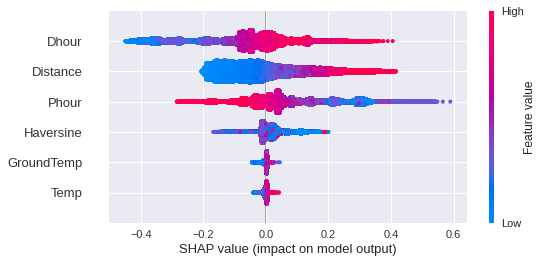

In [26]:
shap.summary_plot(shap_values, X_test)

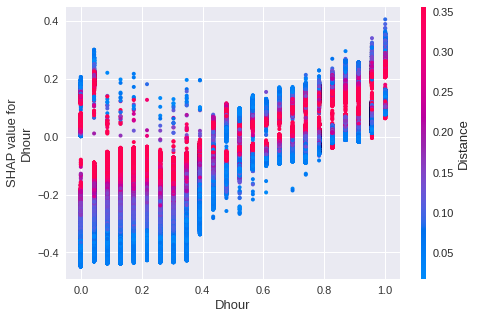

In [27]:
shap.dependence_plot("Dhour", shap_values, X_test)

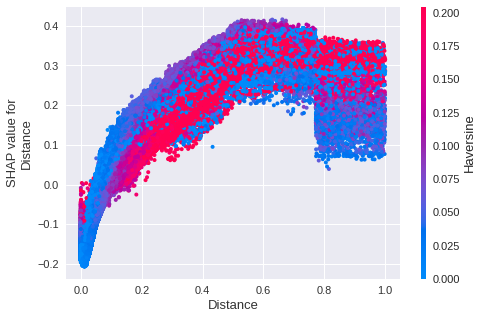

In [28]:
shap.dependence_plot("Distance", shap_values, X_test)

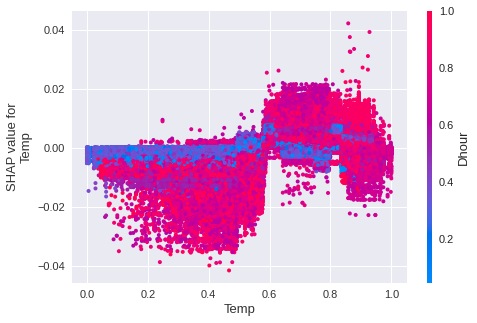

In [29]:
shap.dependence_plot("Temp", shap_values, X_test)

In [30]:
# visualize the first prediction's explaination with a force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [31]:
# visualize the 105th prediction's explaination with a force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[105,:], X_test.iloc[105,:])

## Observations on Explainable AI

The features that contribute to the trip duration of a bicycle are:

*   Distance
*   Harvesine distance (great-circle distance between two points on a sphere)


*   Pick up hour of the bicycles
*   Drop off hour of the bicycles


*   Temperature
*   Ground temperature

From the summary plot, we can see that the lower distances reduced the trip duration. So did lower temperatures, lower harvesine distances and low drop off hours. High pick up hours reduced the trip duration.

The dependence plots shows how the selected features interact with the target variable and it also shows which other feature it interacts with mostly. The drop off hour interacts with the pickup hour while the distance interacts with harvesine distance. The tempereture interacts with the distance too. 

At the first observation, the harvesine distance pushed the score of the model high while the drop off hour, pick up hour and distance pushed the model to score low. 

At the 105th observation, the harvesine distance pushed the model to score low wheareas temperature, ground temperature, distance and pickup hour pushed the model score higher. The temperature did not affect the score of the model at this observation.

Each feature has an impact on the model at each observation. 